<a href="https://colab.research.google.com/github/FaithOIgwe/Covid-19-Analysis-in-Excel/blob/main/Bill_Gates_Twitter_Sentiment_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

I carried out a twitter sentiment analysis of 2000 of **Bill Gates Tweets **in 2022. William Henry Gates III (born October 28, 1955) is an American business magnate, software developer, investor, author, and philanthropist. He is a co-founder of Microsoft, along with his late childhood friend Paul Allen.[2][3] During his career at Microsoft, Gates held the positions of chairman, chief executive officer (CEO), president and chief software architect, while also being the largest individual shareholder until May 2014.[4] He was a major entrepreneur of the microcomputer revolution of the 1970s and 1980s. He is one of the first individuals to shape the world of technology and it was such an honor to be able to mine his tweets to determine the polarity and subjectivity of his tweets if his tweets are centered around negative or positive sentiments.

I used the Google Colaboratory as my IDE, I also applied for Twitter Developper Account(API) to, be granted the permission to scrape this tweets and lastly I used Tweepy to access, the Twitter API in Python.

Let's find out what Bill Gates Tweets about.

Table of content

Import the necessary libraries

Autheticate the user credentials

Load user Credential

Import the Tweets

Clean Tweets

Create a wordcloud using Tweets to find the most common words

The Polarity and Subjectivity of His Tweets

The percentage of Negative and Positive Tweets

Scatter Plots showing the negative and positive tweets

A histogram Showing the type of tweets

In [1]:
#Description : This is a sentiment analysis program that parses the tweets fetched from Twitter using Python
#importing libraries 

import tweepy
from textblob import TextBlob
from wordcloud import wordcloud
from wordcloud import WordCloud 
import pandas as pd
import numpy as np
import re
import os
import matplotlib.pyplot as plt
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy import API
plt.style.use('fivethirtyeight')

In [2]:
#variables that contain the user credentiaals to access Twitter API

consumer_key= os.environ.get('consumer_key')
consumer_secret= os.environ.get('consumer_secret')
access_token= os.environ.get('access_token')
access_token_secret= os.environ.get('acccess_token_secret')

In [ ]:
from tweepy.auth import OAuthHandler

#create the authentication object
authenticate = OAuthHandler(consumer_key, consumer_secret)

#set the access token and access token secret
authenticate.set_access_token(access_token, access_token_secret)

#Create the API object while passing in the authentication information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [ ]:
#Exract 1000 tweets from the twitter user
posts = api.user_timeline(screen_name ="BillGates", count=1000, lang = "en", tweet_mode="extended")

#print the last 5 tweets from the account
print("show the 5 recent tweets: \n")
i=1
for tweet in posts[0:5]:
  print(str(i) + ') '+ tweet.full_text + '\n')
  i = i + 1


show the 5 recent tweets: 

1) After my visit to the @stanforddoerr school of sustainability, I’m even more optimistic that we can develop breakthroughs that will transform our global economy, our lives, and our planet for the better: https://t.co/aILfplXPZQ https://t.co/UzcAj4cTNx

2) I was truly lucky to know Ric Weiland. He was an incredible programmer and an exceptional individual. https://t.co/tkkrpwVUwk

3) Over the years, I’ve come to know Bono as an incredible storyteller and friend. I’m excited for the world to see him the same way. https://t.co/H00SFP8D3Y

4) Thanks for dedicating your career to keeping the world informed, @edyong209. I hope you have a restful sabbatical.

5) The world can end this pandemic while also preventing the next. As @edyong209 shares, "such changes seem unrealistic given the relentless disappointments of the past three years, but substantial social progress always seems unfeasible until it is actually achieved." https://t.co/Y0l1vcYbfl



In [ ]:
#Create a dataframe with a column called Tweets
df = pd.DataFrame( [tweet.full_text for tweet in posts], columns=['Tweets'])

#show the first 5 rows of data
df.head()

,Tweets
0,After my visit to the @stanforddoerr school of...
1,I was truly lucky to know Ric Weiland. He was ...
2,"Over the years, I’ve come to know Bono as an i..."
3,Thanks for dedicating your career to keeping t...
4,The world can end this pandemic while also pre...


In [ ]:
#Clean the text
#Create a function to clean the tweets
def clean(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # Removes @mentions
  text = re.sub(r'#', '', text) #Removing the '#' symbol
  text = re.sub(r'RT[\s]+', '', text) #Removing RT
  text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlink

  return text

  #Cleaning the text
  df['Tweets']= df['Tweets'].apply(cleanTxt)
  
  #Show the Cleaned Text
  print(df)

In [ ]:
#Creata a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#Show the new dataframe with the new columns
print(df)


                                                Tweets  Subjectivity  Polarity
0    After my visit to the @stanforddoerr school of...      0.333333  0.333333
1    I was truly lucky to know Ric Weiland. He was ...      0.783333  0.475000
2    Over the years, I’ve come to know Bono as an i...      0.591667  0.425000
3    Thanks for dedicating your career to keeping t...      0.200000  0.200000
4    The world can end this pandemic while also pre...      0.319444 -0.119444
..                                                 ...           ...       ...
195  Bono, you’re just as amazing a philanthropist ...      0.950000  0.800000
196  I can't wait to read this. https://t.co/5ErEXh...      0.000000  0.000000
197  We will continue working with partners and do ...      0.000000  0.000000
198  The Gates Foundation is coming together today ...      0.569444  0.097222
199  I'm fortunate to be vaccinated and boosted and...      0.483333  0.400000

[200 rows x 3 columns]


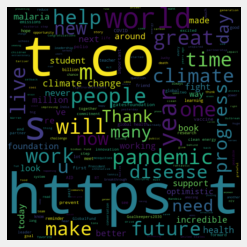

In [ ]:
#Plot Word Cloud
allwords = ' '.join([twts for twts in df['Tweets']])
wordCloud  = WordCloud(width=500, height=500, random_state = 21, max_font_size = 119).generate(allwords) 

#show the wordCloud and interpolation is billinear
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
#Create a function to compute the negative, neutral and positive analysis 
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,After my visit to the @stanforddoerr school of...,0.333333,0.333333,Positive
1,I was truly lucky to know Ric Weiland. He was ...,0.783333,0.475000,Positive
2,"Over the years, I’ve come to know Bono as an i...",0.591667,0.425000,Positive
3,Thanks for dedicating your career to keeping t...,0.200000,0.200000,Positive
4,The world can end this pandemic while also pre...,0.319444,-0.119444,Negative
...,...,...,...,...
195,"Bono, you’re just as amazing a philanthropist ...",0.950000,0.800000,Positive
196,I can't wait to read this. https://t.co/5ErEXh...,0.000000,0.000000,Neutral
197,We will continue working with partners and do ...,0.000000,0.000000,Neutral
198,The Gates Foundation is coming together today ...,0.569444,0.097222,Positive


In [ ]:
 #Checking Positive Tweets %

ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
round((ptweets.shape[0]) / df.shape[0] * 100, 1)

72.5

In [ ]:
 #Checking Negative Tweets %

ptweets = df[df.Analysis == 'Negative']
ptweets = ptweets['Tweets']
round((ptweets.shape[0]) / df.shape[0] * 100, 1)

7.0

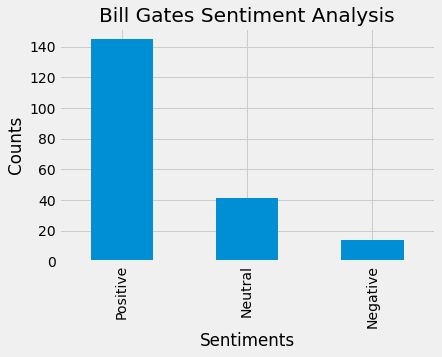

In [ ]:
#Making Histogram

df['Analysis'].value_counts()
plt.title("Bill Gates Sentiment Analysis")
plt.xlabel("Sentiments")
plt.ylabel("Counts")
df['Analysis'].value_counts().plot(kind='bar')
plt.show()